<a href="https://colab.research.google.com/github/pdr0-42/predictions_cancer_cells/blob/feature%2Fvisualization/Cancer_model_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apresentando o projeto 

####Nome do modelo: modelinho do pedrinho.
####Sobre o projeto: Eu adquiri esse dataset do kaggle. É um dataset que possui dados sobre células cancerigenas, com 33 variaveis, com caracteristicas da celula, o id e a variável de saída que seria o diagnostico, classificando a célula cancerigena em maligna ou benigma. O objetivo do modelo é autoexplicativo, realizar previsões para dizer se a célula é cancerigena ou não para fins de ajudar cada vez mais a facilitar o trabalho da medicina.
####Porque começou esse projeto: comecei esse projeto por um interesse enorme pela área, me ajuda muito também em meu trabalho.

# Importando bibliotecas

In [2]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184112 sha256=bcb6f17e9584fd3c1bbb1295b8d7ae0ee1286842cd6983d05e91a827d741c860
  Stored in directory: /root/.cache/pip/wheels/1b/9c/b8/9759d7cc64a1e01bb9872ade80cb7db445ccf506e083325106
Successfully built pyod


In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score,precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from pyod.models.knn import KNN
from scipy.stats import normaltest

# Importando base de dados

In [4]:
df = pd.read_csv('Cancer_Data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Análise Exploratória

### Estudo de variaveis

#### radius_mean - refere-se ao raio médio da célula


#### texture_mean - refere-se a textura da célula


#### perimeter_mean - refere-se ao comprimento médio do contorno externo do núcleo da célula.


#### area_mean - refere-se a area ocupada pela celula


#### smoothness_mean - é uma medida de quão uniforme é o contorno externo da célula


#### compactness_mean - mede o quão compacta é a célula em relação a um círculo ideal.


#### concavity_mean - é uma medida que representa a quantidade de "indentações" ou "concavidades" presentes na célula


#### concave points_mean - Essa medida representa a média dos pontos mais profundos das concavidades presentes na célula. Em outras palavras, ela mede a quantidade de pontos curvos e afundados na borda da célula.


#### symmetry_mean - Essa medida representa a simetria da célula em relação ao seu eixo central.


#### fractal_dimension_mean - Essa medida representa a complexidade da borda da célula, ou seja, mede o quão "recortada" ou "irregular" é a borda da célula.



#### radius_se - mede a variação dos tamanhos dos raios das células na amostra.


#### texture_se - ela mede a variação da textura da célula na imagem.


#### perimeter_se - Essa medida representa o desvio padrão dos valores dos perímetros de uma amostra de células. 


#### area_se - Essa medida representa o desvio padrão dos valores das áreas de uma amostra de células. 


#### smoothness_se - Essa medida representa o desvio padrão dos valores da variação local da distância entre os pontos da célula


#### compactness_se - ela mede a variação da compactação das células na amostra.


#### concavity_se - Essa medida representa o desvio padrão dos valores da profundidade das concavidades presentes na superfície da célula.


#### concave points_se - Essa medida representa o desvio padrão dos valores do número de pontos de concavidade na superfície da célula.


#### symmetry_se - Essa medida representa o desvio padrão dos valores de simetria entre as duas metades da célula.


#### fractal_dimension_se - Essa medida representa o desvio padrão dos valores da dimensão fractal das células na amostra.


#### radius_worst - Essa medida representa o maior valor entre os "raios" das células presentes na amostra.


#### texture_worst  - Essa medida representa o valor médio da variação da intensidade dos pixels na imagem da célula, considerando apenas as regiões com maior variação.

#### perimeter_worst - Essa medida representa o maior valor entre os "perímetros" das células presentes na amostra.

#### area_worst - Essa medida representa a maior área entre as células presentes na amostra.

#### smoothness_worst - Essa medida representa a variação local na distância dos pixels na imagem da célula. Ela indica o quão uniforme é a aparência da célula

#### compactness_worst - Essa medida representa como a área da célula é distribuída em relação ao perímetro da célula.

#### concavity_worst  -  Essa medida representa a severidade das concavidades (indentações) presentes nas células da amostra

#### concave points_worst - Essa medida representa a severidade das concavidades (indentações) presentes nas células da amostra, mas ao contrário da medida "Concavity_worst", a "Concave points_worst" se concentra na quantidade e na severidade dos pontos de concavidade presentes nas células.


#### symmetry_worst - Essa medida representa a variação da simetria entre as duas metades de uma célula.

####  fractal_dimension_worst - Essa medida representa a complexidade da estrutura da célula e da superfície em que a célula se projeta.

In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#### 1 - A classe B representa aproximadamente 62,7% da variável de saída
#### 2 - A classe M representa aproximadamente 37,25% da variável de saída

#### 3 - Pode-se dizer que temos um dataset um pouco desabalanceado

In [6]:
df.shape

(569, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### O dataset não possui dados faltantes, apenas possui uma variável com a tipagem errada,

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


<ipython-input-9-21534dfe6a8f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


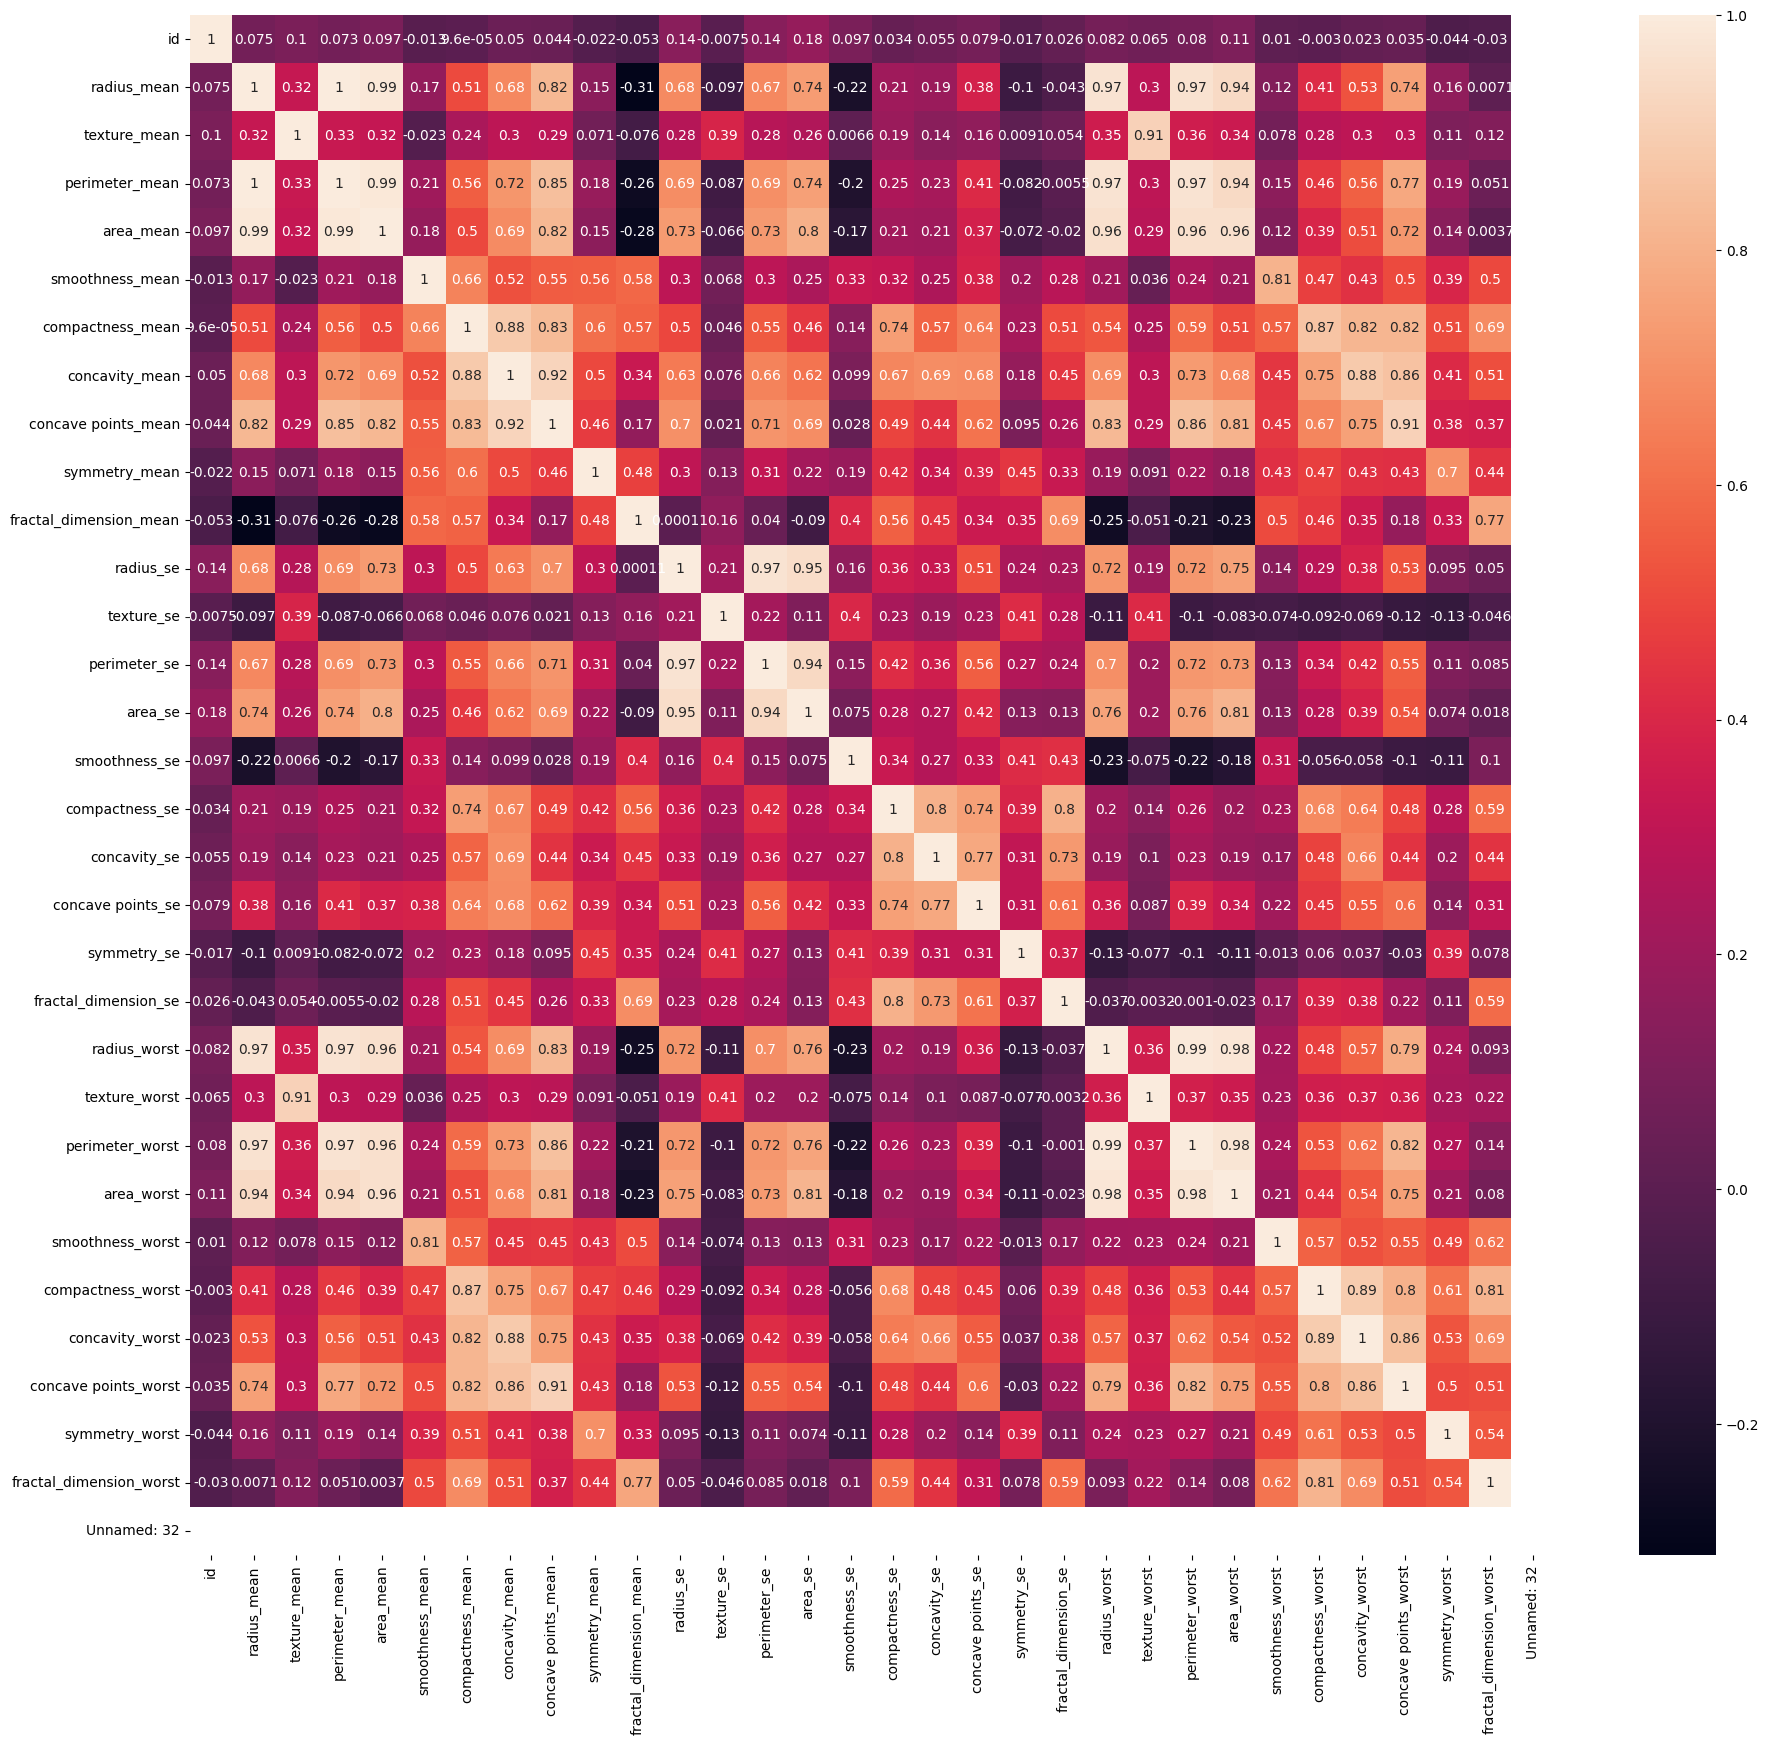

In [9]:
plt.figure(figsize = (22,20))
sns.heatmap(df.corr(),annot = True)
plt.show()

## Analises de correlação

1. As variaveis radius_mean e perimeter_mean possuem uma taxa de correlação extremamente alta de 1.0.

2. Existe muitas variaveis com uma correlação alta, portanto será necessário realizar uma redução de dimensionamento 


#### Entendendo o impacto das variaveis com correlação alta

# Preprocessamento

### Removendo colunas não úteis


In [10]:
df['diagnosis'] = df['diagnosis'].astype('category')

In [11]:
df = df.drop('id', axis = 1)

In [12]:
df = df.drop('Unnamed: 32', axis = 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se   

###  Tratatando outliers

In [14]:
outliers = KNN()
detector_outliers = outliers.fit(df.iloc[:,1:30])

In [15]:
previsoes_outliers = detector_outliers.labels_
previsoes_outliers

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [16]:
np.unique(previsoes_outliers, return_counts = True)

(array([0, 1]), array([512,  57]))

In [17]:
confiabilidade = detector_outliers.decision_scores_
confiabilidade

array([ 220.48124076,   92.56071053,   72.44811544,   45.70047899,
        112.39684312,   56.66619282,   56.5651118 ,   59.40268018,
         38.58038866,   53.82191748,   66.64367617,   60.70086374,
        107.1168427 ,   62.04668308,   21.92332484,   52.15852724,
         92.97116551,   71.35446032,  261.24307012,   18.25214475,
         16.00134344,   22.54166908,   51.25662877,  336.99019699,
        361.22670379,  103.38725042,   46.83318398,  102.53078817,
         82.93104631,   45.37213813,   76.01790487,  126.73260926,
         81.77918848,  108.52285762,   58.31421399,   62.97541929,
         29.37645615,   33.71219422,  104.57433137,   24.13498053,
         41.78562097,   27.74640596,   71.89001835,   66.21294482,
         29.5488483 ,   56.5651118 ,   37.47520908,   40.58347921,
         21.15958084,   18.84957357,   15.47196943,   20.87270248,
         14.51006337,   81.81166982,   54.86305161,   15.99571053,
        176.84806728,   59.0398093 ,   22.10512677,   24.12180

In [18]:
outlier = []
for i in range(len(previsoes_outliers)):
  if previsoes_outliers[i] == 1:
    outlier.append(i)

In [19]:
df_outlier = df.iloc[outlier,:]
df_outlier.shape

(57, 31)

In [20]:
df = df.drop(outlier,axis = 0)

###Tratando Variáveis Categóricas

In [21]:
df['diagnosis'] = pd.get_dummies(df['diagnosis'], drop_first = True, dtype = 'int8')
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


###Tratando variaveis Númericas

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>],
       [<Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>],
       [<Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>],
       [<Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>]], dtype=object)

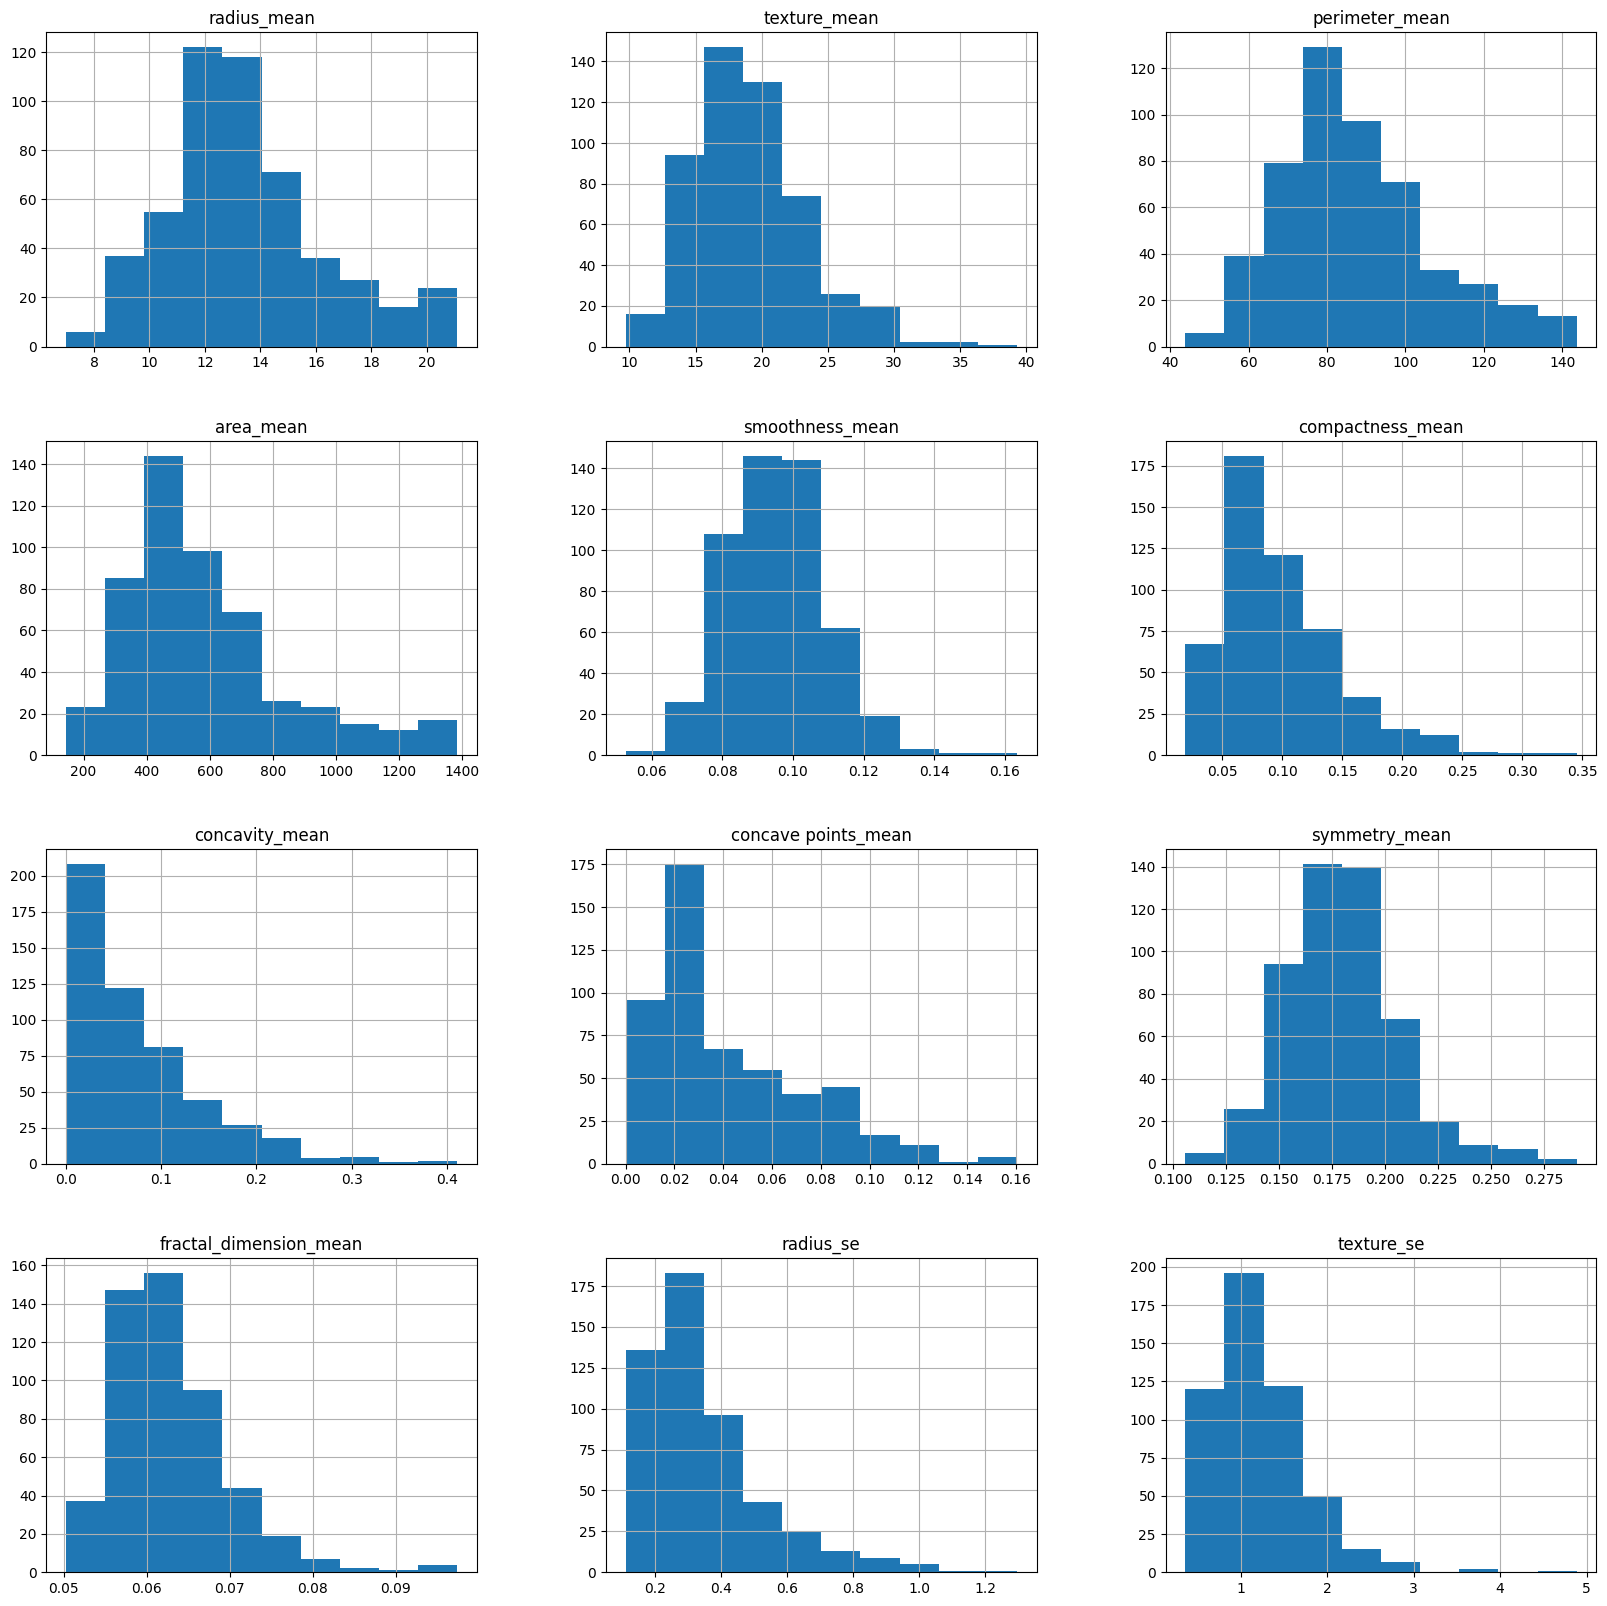

In [22]:
df.iloc[:,1:13].hist(figsize = (20,20))

array([[<Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'center': 'fractal_dimension_se'}>,
        <Axes: title={'center': 'radius_worst'}>],
       [<Axes: title={'center': 'texture_worst'}>,
        <Axes: title={'center': 'perimeter_worst'}>,
        <Axes: title={'center': 'area_worst'}>,
        <Axes: title={'center': 'smoothness_worst'}>],
       [<Axes: title={'center': 'compactness_worst'}>,
        <Axes: title={'center': 'concavity_worst'}>,
        <Axes: title={'center': 'concave points_worst'}>,
        <Axes: title={'center': 'symmetry_worst'}>]], dtype=object)

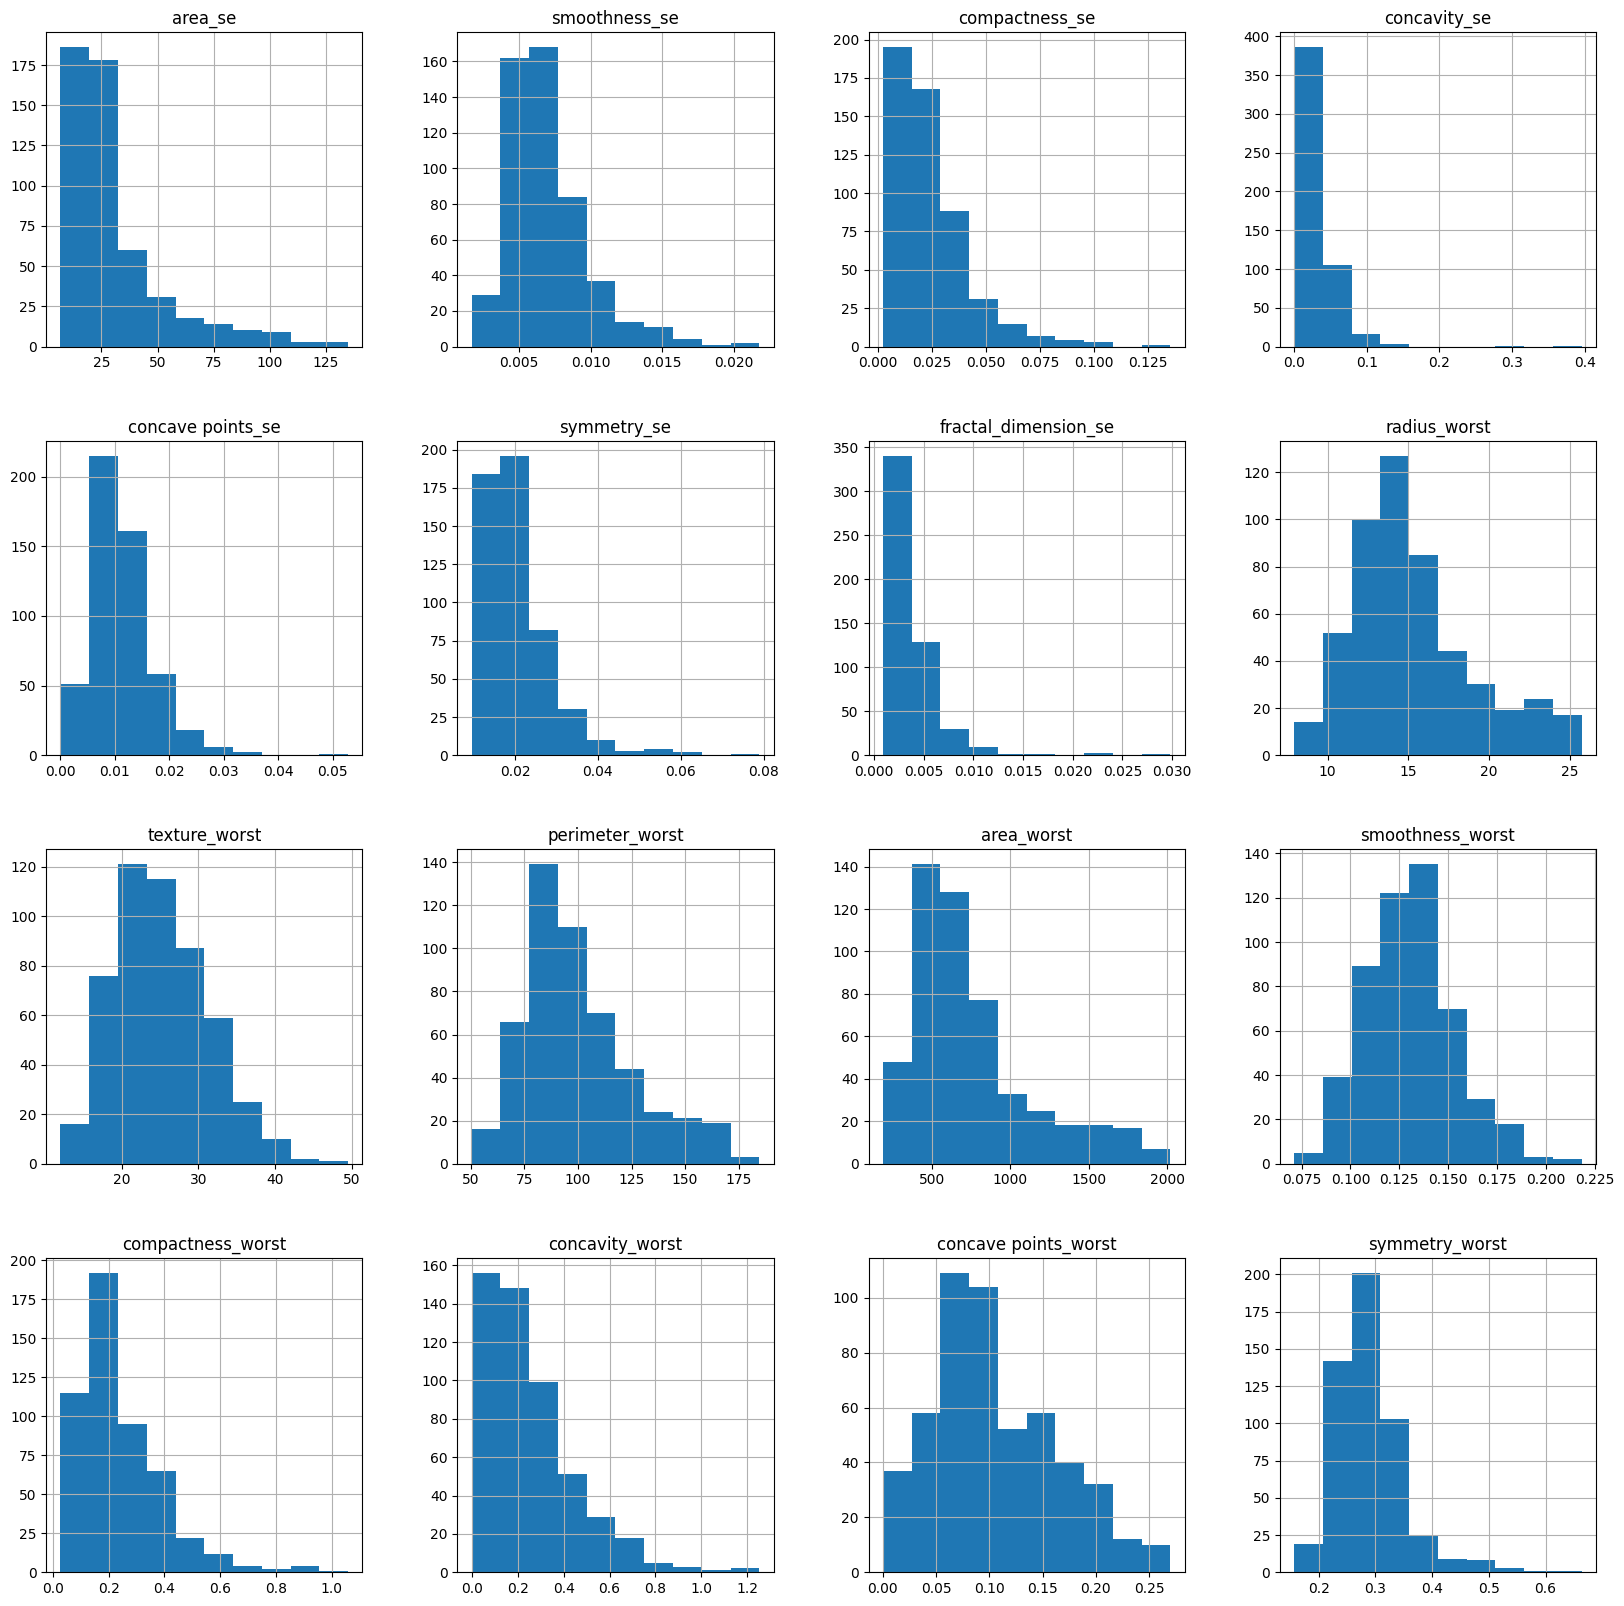

In [23]:
df.iloc[:,14:30].hist(figsize = (20,20))

#### A distribuição é normal, sendo assim tomarei a decisão de realizar uma padronização nos dados

In [54]:
scaler = StandardScaler().fit(df.iloc[:,1:30])
df.iloc[:,1:30] = scaler.transform(df.iloc[:,1:30])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,2.521316,-0.286977,2.364692,2.915960,-0.764944,-0.399253,0.162477,0.903876,0.047268,...,2.609709,-0.311970,2.269966,3.121389,-0.323390,-0.356122,-0.036758,1.374890,-0.225090,0.08902
2,1,2.209933,0.538752,2.214636,2.434122,1.015667,1.304391,1.791946,2.739113,1.016213,...,2.228557,0.038646,2.025704,2.479990,0.583378,1.226314,1.013950,2.336498,1.196747,0.08758
3,1,-0.716353,0.332320,-0.497757,-0.765992,3.372148,3.904094,2.440785,2.017480,3.006886,...,-0.095932,0.199069,-0.053625,-0.483692,3.462147,4.165029,2.204049,2.581117,6.180594,0.17300
5,1,-0.351894,-0.778144,-0.239557,-0.409510,2.319252,1.516141,1.207992,1.244665,1.084077,...,0.054381,-0.255739,0.122011,-0.032115,2.110798,1.894143,1.442185,1.174133,1.809637,0.12440
6,1,1.700399,0.237408,1.676504,1.795588,-0.056567,0.237255,0.542932,1.025631,-0.020596,...,2.043349,0.390915,2.052844,2.212524,0.574574,0.116147,0.651637,1.496356,0.290594,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,2.645161,1.449902,2.887301,2.998226,1.037155,2.639884,3.561506,3.359018,1.317830,...,2.421817,0.680339,3.057032,2.765633,0.420512,1.187069,2.068181,2.525445,0.069821,0.09873
565,1,2.365625,2.199703,2.276728,2.661330,0.170486,0.119849,1.004492,1.785731,-0.178945,...,2.260767,2.142340,2.122633,2.537118,-0.640319,-0.318873,0.365309,0.983498,-0.518355,0.06637
566,1,1.116557,2.159365,1.091803,1.083015,-0.778553,0.096787,0.245204,0.358677,-0.789720,...,0.996524,1.459301,1.025393,0.960886,-0.759167,0.460705,0.459913,0.629222,-1.101588,0.07820
567,1,2.531931,2.455964,2.737245,2.677000,1.602997,3.759433,4.062882,3.505253,2.252843,...,2.811021,2.335841,3.270277,2.770827,1.490146,4.177002,3.471138,2.707645,1.977687,0.12400


###Reduzindo a dimensão do dataset 

In [ ]:
pca  = PCA()


####Verificação da distribuição dos dados

###Separando dataset em dados de teste e dados de treino

###Treinando modelo

## Avaliação de modelo

###F1-Score

### Recall

### Precision

### Curva de decisão

## Conclusão